In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import date

In [2]:
df_cost = pd.read_excel('Quantitative_Task.xlsx', sheet_name='Cost', index_col='Month')
df_value = pd.read_excel('Quantitative_Task.xlsx', sheet_name='Value Info')
df_demo = pd.read_excel('Quantitative_Task.xlsx', sheet_name='Demographic Info')

In [3]:
#checking the data import went ok
df_cost.head()

,Paid Search,Affiliates
Month,,
2013-01-01,41512.00,16421
2013-02-01,61243.00,42101
2013-03-01,84597.88,141321


In [5]:
#inner join df_value and df_demo on customer_id
#this table contains all the customers that we have both value and demographic information for

df_table = pd.merge(df_value, df_demo, how='inner', on='Customer ID')
df_table.set_index('Customer ID', inplace=True)
df_table.head()

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer
Customer ID,,,,,,,,,,
1,8.97261,5.30772,1,6.600000,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search
2,7.92288,70.15680,7,6.639453,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates
3,14.06160,50.80320,7,0.000000,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social
4,14.07672,0.00000,0,0.000000,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates
5,22.68000,68.22144,9,14.771948,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search


In [6]:
df_table.describe()

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions
count,30591.000000,30591.000000,30591.000000,30591.000000
mean,10.681855,37.439037,4.054101,6.479484
std,7.061710,47.474815,4.363664,10.940545
min,0.882000,0.000000,0.000000,-0.049922
25%,5.127000,0.000000,0.000000,0.000000
50%,9.576000,21.384000,3.000000,1.885195
75%,14.827500,57.102560,7.000000,8.118325
max,57.974400,412.663680,32.000000,145.264732


In [7]:
df_table.isnull().sum()

1st Order Profit                    0
Subsequent Order Profit             0
Subsequent Orders Count             0
Total value of all promotions       0
Title                            3975
Date Of Birth                       0
Address City                        0
Contact Allowed                     0
Registration Date                   0
Source of Customer                  0
dtype: int64

<b>Let Start Analyzing the data</b>

<b>First, lets check the Source of the Customer</b>

Customers directly typing in the url is the most common way for a customer to access the TM Lewin webpage 

Organic search, another free method, is the next most effective

The 3 paid options are the least effective


In [8]:
df_table.groupby('Source of Customer')['Source of Customer'].count().sort_values(ascending=False)

Source of Customer
Direct            10941
Organic Search     8164
Paid Search        6354
Affiliates         3756
Paid Social        1376
Name: Source of Customer, dtype: int64

Direct is not only most effective for getting customer to the webpage but it also provides the most profitable group of customers.

This makes sense as regular visitors to a website will likely type in the webpage directly and are also more likely
to be fans of that brand

The paid sources of customer lead to the least profitable group of customers

In [9]:
df_source_of_cust = df_table.groupby('Source of Customer')['1st Order Profit', 'Subsequent Order Profit'].sum()
df_source_of_cust['Total Profit'] = df_source_of_cust['1st Order Profit'] + df_source_of_cust['Subsequent Order Profit']
df_source_of_cust.sort_values('Total Profit', ascending=False)

,1st Order Profit,Subsequent Order Profit,Total Profit
Source of Customer,,,
Direct,118088.71520,416537.284480,534625.999680
Organic Search,90508.08441,316989.975240,407498.059650
Paid Search,69376.28180,236564.673760,305940.955560
Affiliates,29766.67596,108543.676304,138310.352264
Paid Social,19028.85936,66661.976832,85690.836192


The below graph is a visualization of the above table showing most profitable customers by Source of Customer group

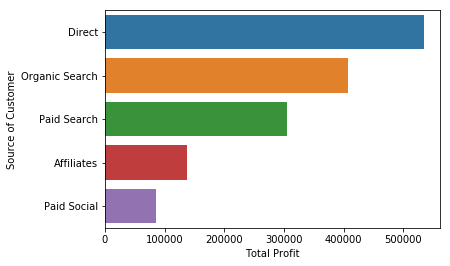

In [10]:
sns.barplot(x='Total Profit', y = 'Source of Customer', data = df_source_of_cust.reset_index().sort_values('Total Profit', ascending=False))

<b>Secondly, lets check out the effect of gender</b>

It is clear to see from the below table that males offer the most profit making potential

In [99]:
df_gender = df_table.groupby('Title')['1st Order Profit', 'Subsequent Order Profit'].sum()
df_gender['Total Profit'] = df_gender['1st Order Profit'] + df_gender['Subsequent Order Profit']
df_gender['Total Profit'] = df_gender['Total Profit'].round(2)
df_gender.sort_values('Total Profit', ascending=False)

,1st Order Profit,Subsequent Order Profit,Total Profit
Title,,,
Mr,221862.31473,816584.838216,1038447.15
Miss,24179.30020,74934.019600,99113.32
Mrs,22760.16230,70669.273600,93429.44
Ms,20874.48040,65561.348000,86435.83


In [258]:
female_profit = df_gender.sort_values('Total Profit', ascending=False).iloc[1:]['Total Profit'].sum()
male_profit = df_gender.iloc[1]['Total Profit']

Males are 3.7 times more profitable than females countrywide

In [335]:
round(male_profit/female_profit,2)

3.72

<b>Now, lets look at location</b>

Dublin is by far the most profitable area in the country as the below table shows

See tableau chart 1.1 for graphic visualization

In [202]:
df_area = df_table.groupby('Address City')['1st Order Profit', 'Subsequent Order Profit'].sum()
df_area['Total Profit'] = df_area['1st Order Profit'] + df_area['Subsequent Order Profit']
df_area['Total Profit'] = df_area['Total Profit'].round(2)
df_area.sort_values('Total Profit', ascending=False).head()

,1st Order Profit,Subsequent Order Profit,Total Profit
Address City,,,
Dublin,224615.54170,790694.120176,1015309.66
Cork,11371.91298,42418.445536,53790.36
Galway,6784.47100,22688.359984,29472.83
Limerick,6520.51184,22422.483168,28943.00
Waterford,4089.58076,13963.990480,18053.57


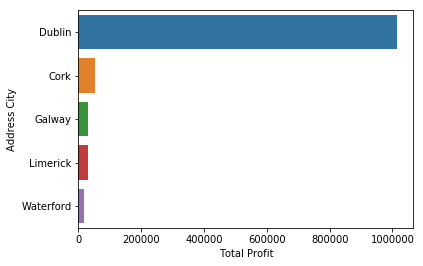

In [268]:
sns.barplot(data=df_area.reset_index().sort_values('Total Profit', ascending=False).head(), 
            x='Total Profit', y='Address City')

<b>Next, lets look at the age profile of our customers</b>

In [105]:
df_table.dtypes

1st Order Profit                        float64
Subsequent Order Profit                 float64
Subsequent Orders Count                   int64
Total value of all promotions           float64
Title                                    object
Date Of Birth                    datetime64[ns]
Address City                             object
Contact Allowed                          object
Registration Date                datetime64[ns]
Source of Customer                       object
dtype: object

I am going to assume the snapshot data was taken today

In [203]:
date = dt.date.today()
date

datetime.date(2019, 4, 24)

In [204]:
df_table['Date'] = date

In [209]:
df_table['Date'] = pd.to_datetime(df_table['Date'])

In [210]:
df_table['Customer Age'] = df_table['Date'] - df_table['Date Of Birth']
df_table['Customer Age']= df_table['Customer Age']/np.timedelta64(1,'Y')
df_table['Customer Age'] = df_table['Customer Age'].round(0)

In [211]:
df_table['Total Profit'] = df_table['1st Order Profit'] + df_table['Subsequent Order Profit']

In [212]:
min_age = df_table['Customer Age'].min()
min_age

26.0

In [213]:
max_age = df_table['Customer Age'].max()
max_age

102.0

In [216]:
df_table['Age Interval'] = pd.cut(df_table['Customer Age'], [25,35,45,55,65,75,85,95,105], 
                                  labels=['25-35','35-45','45-55','55-65','65-75','75-85','85-95','95-105'])

In [265]:
df_table.head()

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Date,Customer Age,Total Profit,Age Interval
Customer ID,,,,,,,,,,,,,,
1,8.97261,5.30772,1,6.600000,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,2019-04-24,46.0,14.28033,45-55
2,7.92288,70.15680,7,6.639453,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,2019-04-24,35.0,78.07968,25-35
3,14.06160,50.80320,7,0.000000,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,2019-04-24,28.0,64.86480,25-35
4,14.07672,0.00000,0,0.000000,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,2019-04-24,32.0,14.07672,25-35
5,22.68000,68.22144,9,14.771948,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,2019-04-24,28.0,90.90144,25-35


The most profitable customers are in between the ages 25-45

In [219]:
df_age = df_table.groupby('Age Interval')['1st Order Profit', 'Subsequent Order Profit'].sum()
df_age['Total Profit'] = df_age['1st Order Profit'] + df_age['Subsequent Order Profit']
df_age['Total Profit'] = df_age['Total Profit'].round(2)
df_age.sort_values('Total Profit',ascending=False)

,1st Order Profit,Subsequent Order Profit,Total Profit
Age Interval,,,
35-45,113143.39686,397664.346704,510807.74
25-35,109602.19566,391857.675808,501459.87
45-55,62815.11415,211737.776680,274552.89
55-65,27079.09066,96136.615424,123215.71
65-75,10852.89700,36808.629280,47661.53
75-85,2709.64240,8914.354240,11624.00
85-95,480.79800,1930.762880,2411.56
95-105,85.48200,247.425600,332.91


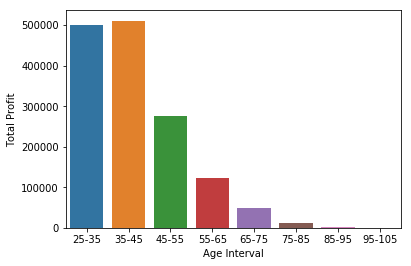

In [220]:
sns.barplot(x='Age Interval', y = 'Total Profit', 
            data = df_age.reset_index())

<b>Now lets drill down into the subcategories of the most profitable categories</b>

For example, lets look at age intervals within the Dublin region

In [245]:
df_table.head(2)

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Date,Customer Age,Total Profit,Age Interval
Customer ID,,,,,,,,,,,,,,
1,8.97261,5.30772,1,6.600000,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,2019-04-24,46.0,14.28033,45-55
2,7.92288,70.15680,7,6.639453,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,2019-04-24,35.0,78.07968,25-35


The below table shows us that Dublin is consistent with the rest of the country in that the most profitable customers 
are aged between 25 and 45. Dublin is in fact most likely driving this statistic in the country as a whole.

In [251]:
table_1 = pd.pivot_table(df_table, values='Total Profit', index=['Address City'], 
                         columns=['Age Interval'], aggfunc=np.sum)

dublin_age_table = table_1.loc['Dublin'].sort_values(ascending=False).round(0)
dublin_age_table

Age Interval
35-45     349138.0
25-35     348365.0
45-55     189310.0
55-65      83404.0
65-75      35107.0
75-85       8192.0
85-95       1521.0
95-105       271.0
Name: Dublin, dtype: float64

Again, within Dublin, Males are the most profitable customer just like in the rest of the country

In [253]:
table_2 = pd.pivot_table(df_table, values='Total Profit', index=['Address City'], 
                         columns=['Title'], aggfunc=np.sum)

dublin_gender = table_2.loc['Dublin'].sort_values(ascending=False).round(0)
dublin_gender

Title
Mr      722152.0
Miss     68160.0
Mrs      63870.0
Ms       57485.0
Name: Dublin, dtype: float64

Even the male:female ratio of 3.8:1 very closely follows the ratio for the country of a whole of 3.7:1
Again the ratio in Dublin is influencing and in fact driving the ratio of the country as a whole

In [255]:
female_dublin_profit= dublin_gender.sort_values(ascending=False).iloc[1:].sum()
female_dublin_profit

189515.0

In [256]:
dublin_gender[0]/female_dublin_profit

3.8105268712239138

<b>Marketing Costs</b>

I assume the marketing costs have already been including in the basic profit calculation (revenue-costs)

In [281]:
#total profits grouped by source of customer
df_source_of_cust.sort_values('Total Profit', ascending=False)

,1st Order Profit,Subsequent Order Profit,Total Profit
Source of Customer,,,
Direct,118088.71520,416537.284480,534625.999680
Organic Search,90508.08441,316989.975240,407498.059650
Paid Search,69376.28180,236564.673760,305940.955560
Affiliates,29766.67596,108543.676304,138310.352264
Paid Social,19028.85936,66661.976832,85690.836192


In [282]:
#marketing costs
df_cost

,Paid Search,Affiliates
Month,,
2013-01-01,41512.00,16421
2013-02-01,61243.00,42101
2013-03-01,84597.88,141321


In [284]:
df_cost.dtypes

Paid Search    float64
Affiliates       int64
dtype: object

In [287]:
#the sum of the df_cost columns
total_marketing_costs = df_cost.sum(axis=0)
total_marketing_costs

Paid Search    187352.88
Affiliates     199843.00
dtype: float64

So paid search offers 1.6 euro in profit for every euro spent in costs

In [293]:
paid_search_cost = total_marketing_costs.loc['Paid Search']
paid_search_cost

187352.88

In [291]:
paid_search_profit = df_source_of_cust.sort_values('Total Profit', ascending=False)['Total Profit'].loc['Paid Search']
paid_search_profit

305940.9555599997

In [299]:
round(paid_search_profit/paid_search_cost,1)

1.6

Affiliates on the other hand only offers 0.7 euro profit for every euro spent on marketing costs

In [295]:
affiliates_cost = total_marketing_costs.loc['Affiliates']
affiliates_cost

199843.0

In [296]:
affiliates_profit = df_source_of_cust.sort_values('Total Profit', ascending=False)['Total Profit'].loc['Affiliates']
affiliates_profit

138310.3522639999

In [300]:
round(affiliates_profit/affiliates_cost,1)

0.7

<b>Promotion Costs and Additional Analysis</b>

In [262]:
promotion_costs_by_location = df_table.groupby('Address City')['Total value of all promotions'].sum()
promotion_costs_by_location.sort_values(ascending=False).head()

Address City
Dublin       138110.348161
Cork           7414.749852
Galway         4134.586026
Limerick       3888.525100
Waterford      2457.336012
Name: Total value of all promotions, dtype: float64

I am using the below set of scatter plots, matrix's etc to check for a linear relationship between the value variables.

The only strong relationship, of r = 0.86, is between Subsequent Order Profit and Subsequent Orders Count. 
This makes sense as the higher the number of subsequent orders the higher the profit should be.

It is clear from the below that no lineaer relationships exist between any of the other variables

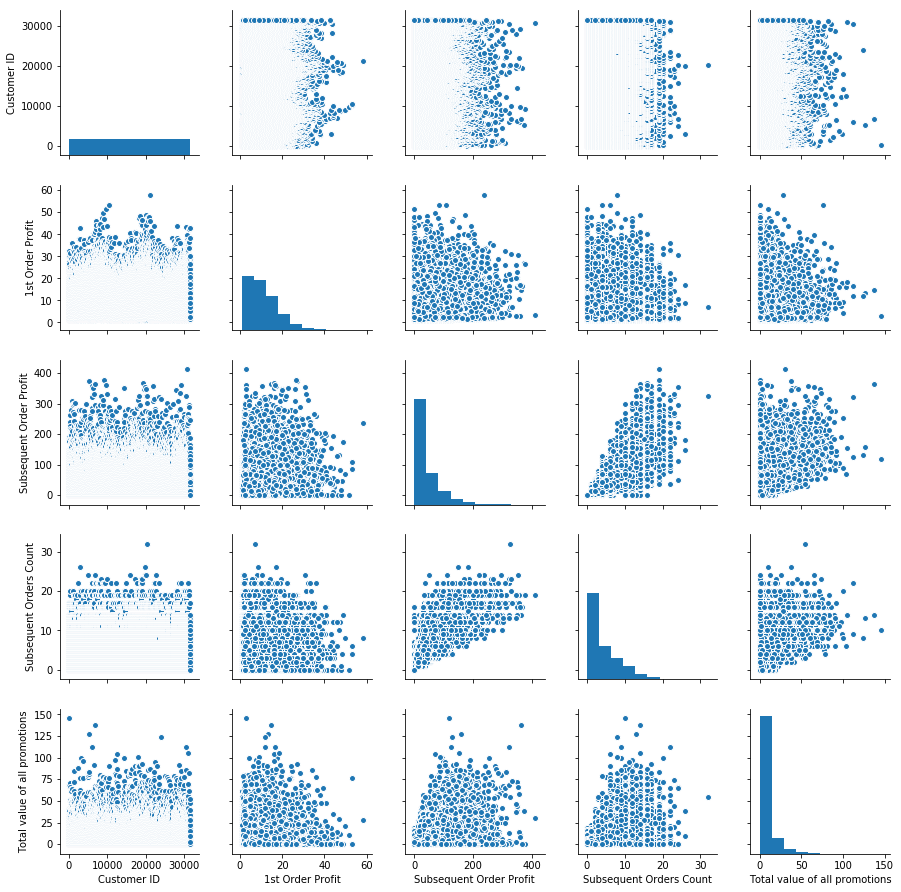

In [269]:
sns.pairplot(df_value)

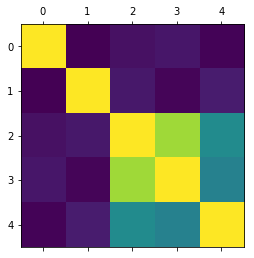

In [273]:
plt.matshow(df_value.corr())
plt.show()

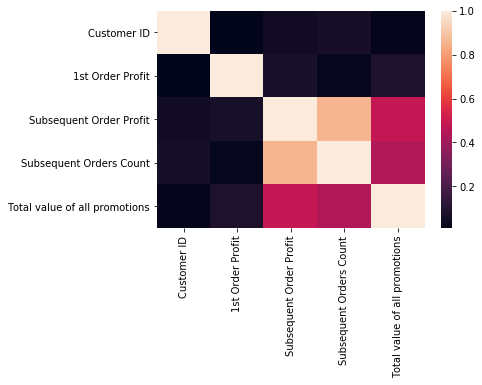

In [274]:
sns.heatmap(df_value.corr())

In [280]:
round(df_value['Subsequent Order Profit'].corr(df_value['Subsequent Orders Count']),2)

0.86

<b>Building Out Further Analysis</b>

Lets look at the most profitable age groups within each gender

In [303]:
#combining all the female terms together to analyze the male female divide
df_table['Gender'] = df_table['Title'].replace({'Mr': 'M', 'Miss': 'F', 'Mrs': 'F', 'Ms': 'F'})
df_table.head()

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Date,Customer Age,Total Profit,Age Interval,Gender
Customer ID,,,,,,,,,,,,,,,
1,8.97261,5.30772,1,6.600000,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,2019-04-24,46.0,14.28033,45-55,M
2,7.92288,70.15680,7,6.639453,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,2019-04-24,35.0,78.07968,25-35,M
3,14.06160,50.80320,7,0.000000,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,2019-04-24,28.0,64.86480,25-35,M
4,14.07672,0.00000,0,0.000000,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,2019-04-24,32.0,14.07672,25-35,M
5,22.68000,68.22144,9,14.771948,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,2019-04-24,28.0,90.90144,25-35,M


In [307]:
table_3 = pd.pivot_table(df_table, values='Total Profit', index=['Gender', 'Age Interval'], 
                         aggfunc=np.sum)
table_3

Total Profit
Gender Age Interval               
F      25-35          88611.169600
       35-45          97433.290800
       45-55          54646.948400
       55-65          27455.658300
       65-75           8476.647000
       75-85           1946.370000
       85-95            318.590000
       95-105            89.910000
M      25-35         366700.470168
       35-45         355742.607864
       45-55         187985.282130
       55-65          81739.206384
       65-75          34953.083280
       75-85           9220.196640
       85-95           1916.948880
       95-105           189.357600

In [310]:
table_3.loc['F'].sort_values('Total Profit',ascending=False)

,Total Profit
Age Interval,
35-45,97433.2908
25-35,88611.1696
45-55,54646.9484
55-65,27455.6583
65-75,8476.6470
75-85,1946.3700
85-95,318.5900
95-105,89.9100


The two most profitable age intervals in the Male category are the same as their female 
counterparts except in reverse order

In [313]:
table_3.loc['M'].sort_values('Total Profit',ascending=False)

,Total Profit
Age Interval,
25-35,366700.470168
35-45,355742.607864
45-55,187985.282130
55-65,81739.206384
65-75,34953.083280
75-85,9220.196640
85-95,1916.948880
95-105,189.357600


Below I have broken down by Gender and Age Interval on the index and location on the columns.

So we can see that nobody between the ages of 85 and 105 is spending any money in TM Lewin in Sligo

In [315]:
table_4 = pd.pivot_table(df_table, values='Total Profit', index=['Gender', 'Age Interval'], 
                         columns=['Address City'], aggfunc=np.sum)
table_4['Sligo']

Gender  Age Interval
F       25-35            250.736000
        35-45            301.896600
        45-55            139.761000
        55-65             76.320000
        65-75            160.600000
        75-85             23.340000
        85-95                   NaN
        95-105                  NaN
M       25-35           1842.059040
        35-45           1477.246800
        45-55           1067.133312
        55-65            250.305600
        65-75            344.049600
        75-85             39.518400
        85-95                   NaN
        95-105                  NaN
Name: Sligo, dtype: float64

Lets check to see what Source of Customer (Advertising Type) is best for each age group

See tableau chart 1.2 for visualization

In [317]:
table_5 = pd.pivot_table(df_table, values='Total Profit', index=['Age Interval', 'Source of Customer'], 
                         aggfunc=np.sum)
table_5

Total Profit
Age Interval Source of Customer               
25-35        Affiliates           44352.206948
             Direct              181479.904440
             Organic Search      147544.484560
             Paid Search          95539.299040
             Paid Social          32543.976480
35-45        Affiliates           45537.676772
             Direct              197188.485680
             Organic Search      138752.108160
             Paid Search         104353.314520
             Paid Social          24976.158432
45-55        Affiliates           28994.227780
             Direct               96920.463000
             Organic Search       70820.340130
             Paid Search          62245.536720
             Paid Social          15572.323200
55-65        Affiliates           13569.529204
             Direct               41388.126960
             Organic Search       32201.378400
             Paid Search          27451.796480
             Paid Social           8604.875040
65-75        Affiliates            4862.009320
             Direct               14293.222000
             Organic Search       13133.459600
             Paid Search          12588.272800
             Paid Social           2784.562560
75-85        Affiliates             674.949520
             Direct                2727.711200
             Organic Search        4678.455200
             Paid Search           2843.557200
             Paid Social            699.323520
85-95        Affiliates             265.670720
             Direct                 628.086400
             Organic Search         150.768000
             Paid Search            857.418800
             Paid Social            509.616960
95-105       Affiliates              54.082000
             Direct                        NaN
             Organic Search         217.065600
             Paid Search             61.760000
             Paid Social                   NaN

Out of all the customers who visit the site how many make a purchase?

The answer is 97%. A very high conversion rate

In [357]:
#purchasing customers represents all customers who made at least one purchase
purchasing_customers = df_table['1st Order Profit'].count().sum()
all_customers = df_demo['Customer ID'].count().sum()
(purchasing_customers/all_customers)*100

97.29652364746669

Not all customers who made an initial order went on to make a subsequent order

In fact only 65% of customers went on to make a second purchase

In [349]:
purchasing_customers

30591

In [362]:
recurring_customers = df_table[df_table['Subsequent Orders Count']>0]['Subsequent Orders Count'].count()
recurring_customers

19850

In [370]:
round(recurring_customers/purchasing_customers*100,2)

64.89

Next, check the average subsequent order profit

In [398]:
num_subsequent_orders = df_table[df_table['Subsequent Orders Count']>0]['Subsequent Orders Count']
subsequent_orders_total_profit = df_table[df_table['Subsequent Orders Count']>0]['Subsequent Order Profit']
subsequent_orders_avg_profit = subsequent_orders_total_profit/num_subsequent_orders
subsequent_orders_avg_profit.head()

Customer ID
1     5.30772
2    10.02240
3     7.25760
5     7.58016
6    11.37024
dtype: float64

Below is the distribution of average profit of subsequent orders

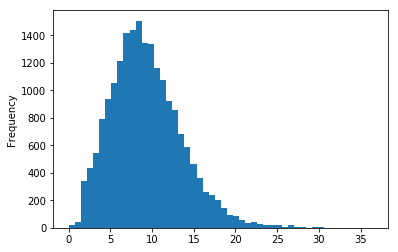

In [405]:
subsequent_orders_avg_profit.plot(kind='hist', bins=50)

Brief Summary

Free customer sources are more effective for getting customers to the TM Lewin webpage than paid sources.
The free sources of customer also provide the most profitable group of customers.
See tableau chart 1.2 which confirms direct source of customers is the most effective in almost every age group.

Males offer higher profit-making potential than females.
The 35-45 age group is the most profitable age group countrywide followed closely by the 25-35 age group.
Within the Male category the 25-35 age group is the most profitable and the 35-45 age group is the most profitable female age profile.

Dublin is the most profitable location in the country.

Page search offers 1.6 euro in profits for every euro spent on marketing costs whilst affiliates offers 0.7 euros in profits per euro of marketing costs.

97% of customers who visit the website make a purchase and 65% of the customers who made an initial purchase went on to make at least one subsequent purchase.


The below exports are for the purpose of creating the tableau visualizations

In [320]:
df_table.to_excel('df_table.xlsx')
df_source_of_cust.to_excel('df_source_of_cust.xlsx')
table_5.to_excel('table_5.xlsx')
subsequent_orders_avg_profit.to_excel('subsequent_orders_avg_profit.xlsx')